In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geo_json_obj = gpd.read_file("sugarcane_growth_patches.geojson")

# Inspect the GeoDataFrame
print("CRS:", geo_json_obj.crs)
print("Total Bounds:", geo_json_obj.total_bounds)
print("Valid Geometries:", geo_json_obj.geometry.is_valid.all())
print("Empty Geometries:", geo_json_obj.geometry.is_empty.any())
print("Missing Geometries:", geo_json_obj.geometry.isna().any())
print("Growth Stage Values:", geo_json_obj['growth_stage'].unique())
print("Number of Features:", len(geo_json_obj))

In [ ]:
# Assign a CRS (e.g., UTM Zone 43N)
geo_json_obj = geo_json_obj.set_crs("EPSG:32643", allow_override=True)

In [ ]:
# Replace null values in growth_stage with 'unknown'
geo_json_obj['growth_stage'] = geo_json_obj['growth_stage'].fillna('unknown')

In [ ]:
# Define a categorical colormap
from matplotlib.colors import ListedColormap
colors = ['#FF0000', '#808080']  # Red for grand_growth, gray for unknown
cmap = ListedColormap(colors)

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
geo_json_obj.plot(
    column='growth_stage',
    cmap=cmap,
    ax=ax,
    legend_kwds={'labels': ['grand_growth', 'unknown']}  # Custom legend labels
)
ax.set_title('Sugarcane Growth Stages')
#ax.set_aspect('equal')  # Ensure correct spatial proportions
plt.show()

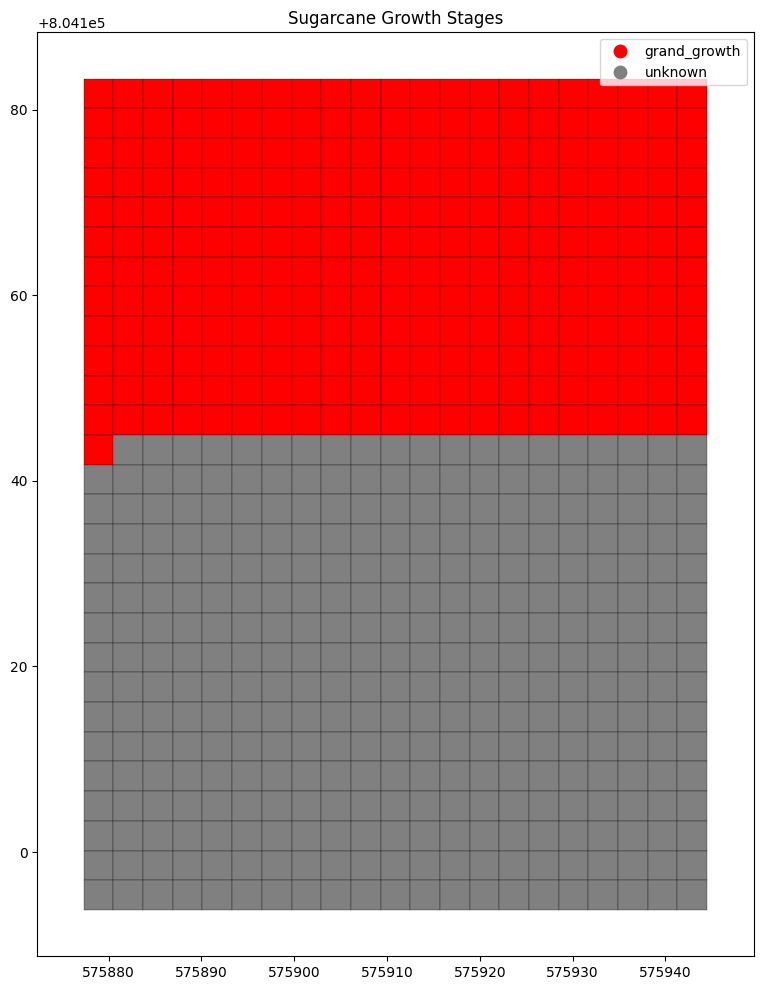

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the GeoJSON file
geo_json_obj = gpd.read_file("sugarcane_growth_patches.geojson")

# Assign a CRS (adjust EPSG code based on your location)
geo_json_obj = geo_json_obj.set_crs("EPSG:32643", allow_override=True)

# Replace null values in growth_stage
geo_json_obj['growth_stage'] = geo_json_obj['growth_stage'].fillna('unknown')

# Define a categorical colormap
colors = ['#FF0000', '#808080']  # Red for grand_growth, gray for unknown
cmap = ListedColormap(colors)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
geo_json_obj.plot(
    column='growth_stage',
    legend=True,
    cmap=cmap,
    edgecolor='black',
    linewidth=0.2,
    ax=ax,
    categorical=True,
    legend_kwds={'labels': ['grand_growth', 'unknown']}
)
ax.set_title('Sugarcane Growth Stages')
ax.set_aspect('equal')

# Zoom to bounds with a buffer
minx, miny, maxx, maxy = geo_json_obj.total_bounds
buffer = 5
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

plt.show()

c:\Users\user\anaconda3\envs\research_env\lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


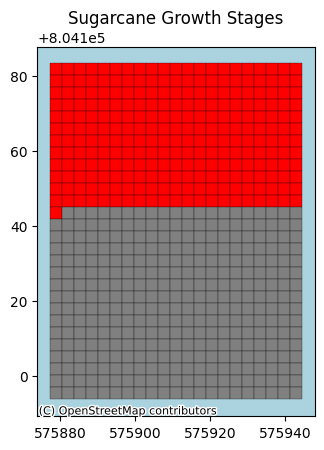

In [12]:
import contextily as cx
fig, ax = plt.subplots()
geo_json_obj.plot(column='growth_stage', cmap=cmap, edgecolor='black', linewidth=0.2, ax=ax, categorical=True)
cx.add_basemap(ax, crs=geo_json_obj.crs, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_title('Sugarcane Growth Stages')
#ax.set_aspect('equal')
plt.show()

In [2]:
import rasterio
from pathlib import Path

root_dir = Path("../../")   # Adjust this path to your project root
src_dir = root_dir / "src"  # Path to your source directory
ORIGINAL_CRS = ""

geo_tiff_path = root_dir / "temp" / "odm_orthophoto" / "odm_orthophoto.tif"
# if the file exists,
if geo_tiff_path.exists():
    print(f"GeoTIFF file found: {geo_tiff_path}")
else:
    print(f"GeoTIFF file not found: {geo_tiff_path}")
    
with rasterio.open(geo_tiff_path) as src:
    print("GeoTIFF CRS:", src.crs)
    ORIGINAL_CRS = src.crs.to_string()

GeoTIFF file found: ..\..\temp\odm_orthophoto\odm_orthophoto.tif
GeoTIFF CRS: EPSG:32644


In [3]:
print("Original CRS:", ORIGINAL_CRS)

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.colors import ListedColormap

# Load the GeoJSON file
geo_json_obj = gpd.read_file("sugarcane_growth_patches.geojson")

# Assign the CRS (replace with the correct EPSG code from your GeoTIFF)
geo_json_obj = geo_json_obj.set_crs(ORIGINAL_CRS, allow_override=True)

# Verify CRS and bounds
print("CRS:", geo_json_obj.crs)
print("Total Bounds:", geo_json_obj.total_bounds)
print("Growth Stage Values:", geo_json_obj['growth_stage'].unique())
print("Number of Features:", len(geo_json_obj))

Original CRS: EPSG:32644
CRS: EPSG:32644
Total Bounds: [575877.31941712 804093.77195026 575944.50054072 804183.34281302]
Growth Stage Values: ['grand_growth' None]
Number of Features: 588


In [4]:
# Replace null values with 'unknown'
geo_json_obj['growth_stage'] = geo_json_obj['growth_stage'].fillna('unknown')

In [5]:
# Define a categorical colormap
colors = ['#FF0000', '#808080']  # Red for grand_growth, gray for unknown
cmap = ListedColormap(colors)

c:\Users\user\anaconda3\envs\research_env\lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


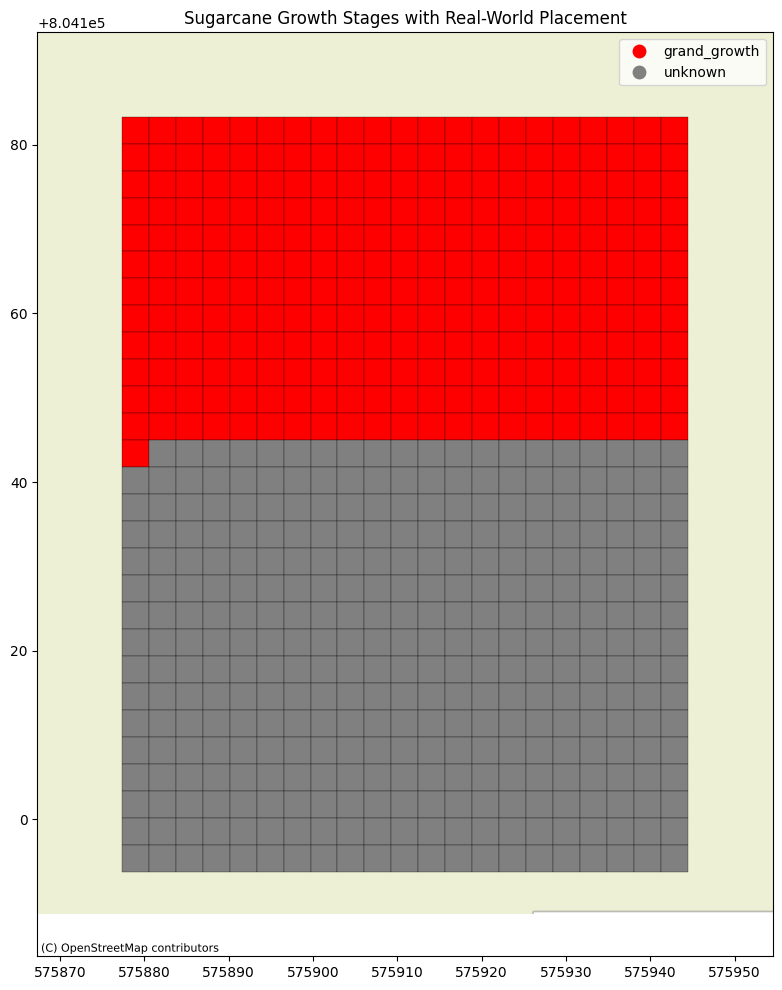

In [9]:
# Reproject to EPSG:3857 for basemap compatibility (if not already in a compatible CRS)
# if geo_json_obj.crs != "EPSG:3857":
#     geo_json_obj = geo_json_obj.to_crs("EPSG:3857")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
geo_json_obj.plot(
    column='growth_stage',
    legend=True,
    cmap=cmap,
    edgecolor='black',
    linewidth=0.2,  # Thin lines for small patches
    ax=ax,
    categorical=True,
    legend_kwds={'labels': ['grand_growth', 'unknown'], 'loc': 'upper right'}
)

# Add basemap (OpenStreetMap)
cx.add_basemap(ax, crs=geo_json_obj.crs, source=cx.providers.OpenStreetMap.Mapnik)

# Set title and ensure equal aspect ratio
ax.set_title('Sugarcane Growth Stages with Real-World Placement')
ax.set_aspect('equal')

# Zoom to bounds with a buffer
minx, miny, maxx, maxy = geo_json_obj.total_bounds
buffer = 10  # 10-meter buffer for visibility
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

plt.show()

In [17]:
import folium

# Create a Folium map centered on the centroid of the patches
centroid = geo_json_obj.to_crs("EPSG:4326").geometry.centroid
m = folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=16, tiles="OpenStreetMap")

# Add GeoJSON to the map with style based on growth_stage
folium.GeoJson(
    geo_json_obj.to_crs("EPSG:4326"),
    style_function=lambda x: {
        'fillColor': '#FF0000' if x['properties']['growth_stage'] == 'grand_growth' else '#808080',
        'color': 'black',
        'weight': 0.2,
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(fields=['growth_stage', 'row_start', 'col_start'])
).add_to(m)

# Save and display
m.save("sugarcane_growth_map.html")
print("Interactive map saved as sugarcane_growth_map.html")

Interactive map saved as sugarcane_growth_map.html


C:\Users\user\AppData\Local\Temp\ipykernel_13580\2143378986.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = geo_json_obj.to_crs("EPSG:4326").geometry.centroid
